# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [ ]:
0.13 is non critic with N=200
0.16 is critic with N=200
0.145 is non critic with N=200
0.1525 is critic with N=200

In [623]:
0.305/2


0.1525

In [656]:
m = 1
A = 0.1525#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [657]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [658]:
global compactified=true
global loggrid=true

global bisection=false

false

In [659]:
using Quadmath, Printf

res=m;
N=2.0^m*1000.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*1000.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [660]:
iter=1
"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio$iter.csv"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio1.csv"

In [661]:
print(N)

1000.0

In [662]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [663]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [664]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

"""if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
end;""";

step size is  0.001
the time step is 0.0001


# Initial data of m β Ψ and Ψ,x

In [665]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [666]:
"""derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
eval1 = derpsi_func(inverse(initX1))

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
eval2 = derpsi_func(initX1)


plot([(initX1) initX1 initX1] , [eval1 eval2 state_array[4:L-3,4]])""";

In [667]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [668]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [669]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

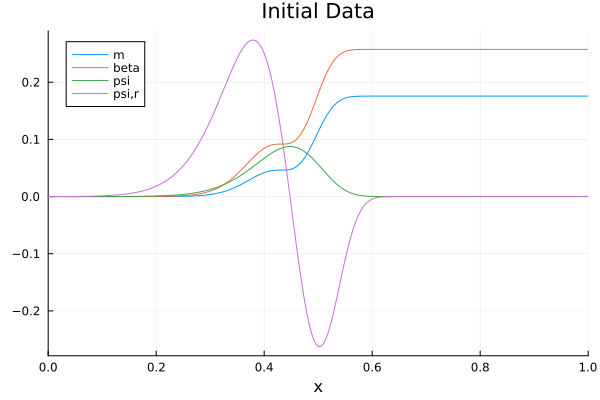

In [670]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse.(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [671]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [672]:
using Tables

global files=["m", "beta", "psi", "derpsi", "monitorratio"]

print_muninn(files, 0, [state_array[:,1:5] monitor_ratio],res,"w")

In [673]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [674]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

0.012337033405153233


In [675]:
using Base.Threads
Threads.nthreads()

4

In [676]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [ ]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 1.23370334051014e-6, t=0.0006168516702567994 speed is 0.49999876630256535, dx/dt=810.5676358033505


iteration 1000 dt is 1.233703340494276e-6, t=0.0012337033405083505 speed is 0.4999987663089947, dx/dt=810.5676358137733


iteration 1500 dt is 1.2337033404672818e-6, t=0.001850555010749199 speed is 0.499998766319935, dx/dt=810.5676358315092


iteration 2000 dt is 1.2337033404286973e-6, t=0.002467406680973669 speed is 0.4999987663355726, dx/dt=810.56763585686


iteration 2500 dt is 1.2337033403780515e-6, t=0.0030842583511758426 speed is 0.4999987663560985, dx/dt=810.5676358901352


iteration 3000 dt is 1.233703340314861e-6, t=0.0037011100213495737 speed is 0.49999876638170854, dx/dt=810.5676359316527


iteration 3500 dt is 1.2337033402386314e-6, t=0.004317961691488465 speed is 0.4999987664126031, dx/dt=810.567635981737


iteration 4000 dt is 1.2337033401488559e-6, t=0.004934813361585866 speed is 0.4999987664489876, dx/dt=810.5676360407214


iteration 4500 dt is 1.23



iteration 34500 dt is 1.233703279381296e-6, t=0.042562764676699 speed is 0.4999987910770367, dx/dt=810.567675966219


iteration 35000 dt is 1.2337032767975293e-6, t=0.04317961631574575 speed is 0.49999879212419307, dx/dt=810.5676776638052


iteration 35500 dt is 1.2337032741328912e-6, t=0.04379646795348041 speed is 0.4999987932041252, dx/dt=810.5676794145256


iteration 36000 dt is 1.2337032713855267e-6, t=0.04441331958986208 speed is 0.4999987943175849, dx/dt=810.567681219599


iteration 36500 dt is 1.2337032685535474e-6, t=0.04503017122484898 speed is 0.49999879546533765, dx/dt=810.567683080266


iteration 37000 dt is 1.2337032656350316e-6, t=0.04564702285839831 speed is 0.49999879664816205, dx/dt=810.5676849977891


iteration 37500 dt is 1.2337032626280244e-6, t=0.046263874490466296 speed is 0.49999879786685053, dx/dt=810.5676869734529


iteration 38000 dt is 1.233703259530535e-6, t=0.046880726121008194 speed is 0.49999879912220996, dx/dt=810.5676890085653


iteration 38500 dt is 

#### 

In [ ]:
0.053-0.052

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/newgrid/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/newgrid/anim_res1.gif")
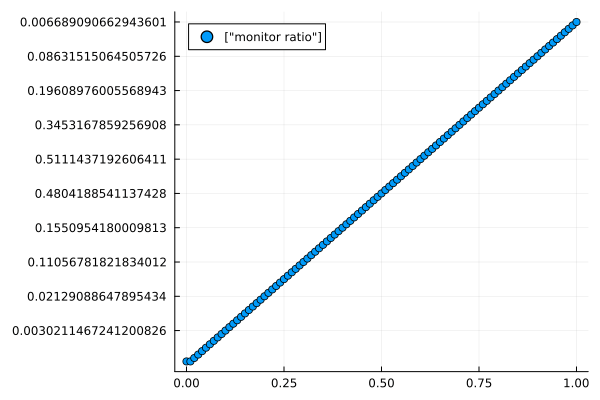

In [437]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

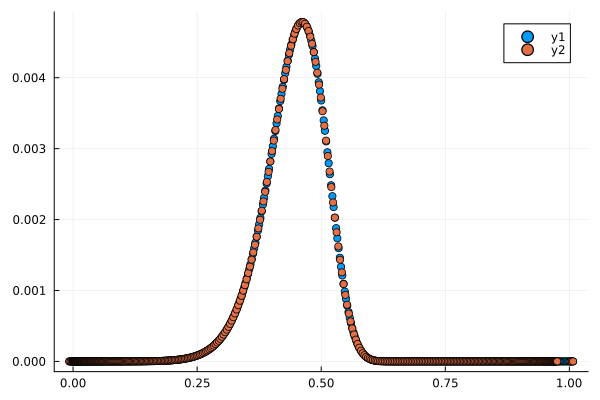

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

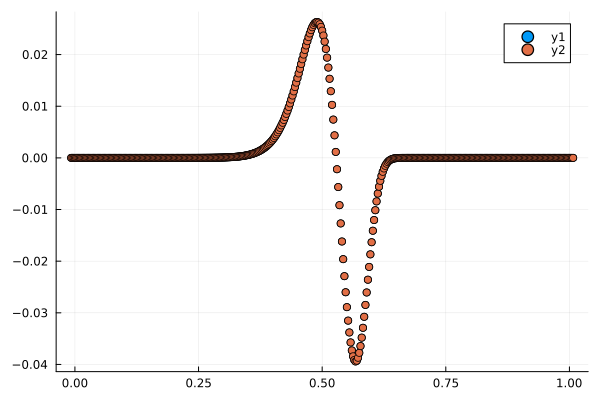

In [417]:
scatter([x1,x1],[y1,y2])